In [1]:
import sys
sys.path.insert(0, '../python')
from bifDiag import bifDiag
from matplotlib import pyplot as plt
import numpy as np

In [33]:
# load AUTO data
bname, sname = "saves/b.kak", "saves/s.kak"
bd = bifDiag(bname,sname)

In [34]:
# these are the types and labels for algebraic problems
# "user output point" is type number -4, so this works for that
AUTOtypes = ["","BP","LP","HB","","","UZ","","","EP"]
NDim = bd[0].c['NDIM']

# branches of the solution
branches = [ 
         { "par"       : br.coordarray[0,:], 
           "L2norm"    : br.coordarray[1,:],
           "branchnum" : br.BR
         } for br in bd ]

# individual solutions
sols = [ {  "u"         : np.array( s[0]['u'] ),
            "L2norm"    : np.linalg.norm( s[0]['u'] ),
            "par"       : s.PAR[0],
            "branchnum" : s.data['BR'],
            "typenum"   : s.data['TY number'],
            "type"      : AUTOtypes[ s.data['TY number'] ],
         } for s in bd() ]

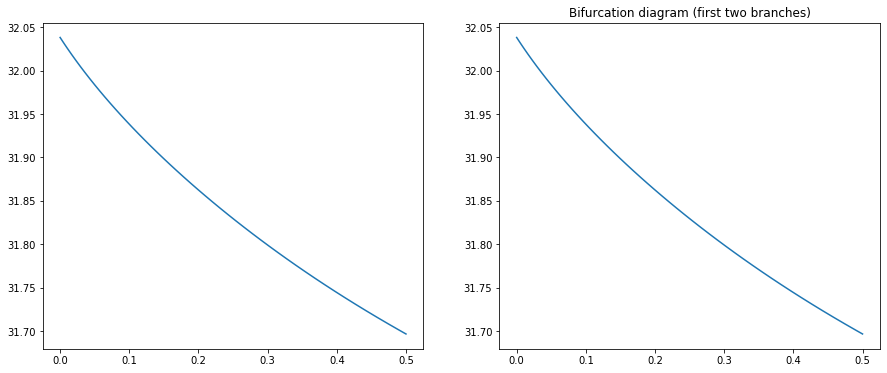

In [5]:
# plot bifurcation diagram
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# whole thing
for branch in branches:
    bcolor = 'C'+str( branch["branchnum"] - 1 )
    axs[0].plot( branch['par'], branch['L2norm'], c=bcolor)
    
# initial branches only
num_branches = 1;
for branch in branches[0:num_branches]:
    bcolor = 'C'+str( branch["branchnum"] - 1 )
    axs[1].plot( branch['par'], branch['L2norm'], c=bcolor)
    axs[1].set_title('Bifurcation diagram (first two branches)')

In [35]:
# plot solution along with place on bifurcation diagram
def plotsol(index, save=0):
    sol = sols[index]['u']
    center = int(len(sol)/2);
    x = range(-center+1,center+1)

    fontsize=20
    fig = plt.figure(figsize=(5,5))
    plt.plot(x, sol, 'o-',linewidth=2, markersize=10)
    plt.xlim((-10,10))
    plt.xticks([-10,-5,0,5,10],fontsize=fontsize)
    plt.yticks([0,2,4,6],fontsize=fontsize)
    plt.xlabel('$n$',fontsize=fontsize)
    plt.ylabel('$u$',fontsize=fontsize)
    plt.tight_layout()
    
    if save != 0:
        plt.savefig('images/kak.eps', format='eps')

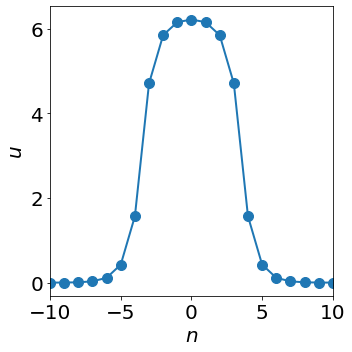

In [36]:
plotsol(-1,1)